In [2]:
import pandas as pd

# Load the dataset from an Excel file
file_path = '/content/RE Hedonic Pricing Case Data Sp24.xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(file_path, sheet_name='Original Data', header=1)

# Display the first few rows to confirm it's loaded correctly
print(data.head(150))


          Date   Price                Address        City      Zip  Beds  \
0   2022-10-07  337000    609 Sweet Bay Ridge   Woodstock  30188.0     3   
1   2022-10-13  735000  909 S on Main Drive    Woodstock,  30188.0     3   
2   2022-11-22  460265         243 Vista Lane   Woodstock  30189.0     3   
3   2022-11-28  559900       409 Chandler Ln   Woodstock,  30188.0     3   
4   2022-12-13  409990       200 Atkinson Way   Woodstock  30189.0     4   
..         ...     ...                    ...         ...      ...   ...   
133 2023-09-28  435000   368 Cherry Hill Lane   Woodstock  30188.0     3   
134 2023-09-29  474900   698 Stickley Oak Way   Woodstock  30189.0     3   
135 2023-09-29  479900   712 Stickley Oak Way   Woodstock  30189.0     3   
136 2023-10-02  468900   710 Stickley Oak Way   Woodstock  30189.0     3   
137 2023-10-10  520000        138 Inwood Walk   Woodstock  30188.0     4   

     Full Baths  Half Baths  Unit SF  Lot SF  ...  Stories End Unit  Basement  \
0     

In [3]:
# Step 1: Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Step 2: Correct data types if needed (This depends on the output of step 1)
# For example, if 'Price' is not in numeric format, you would convert it like this:
# data['Price'] = data['Price'].replace('[\$,]', '', regex=True).astype(float)

# Display data types
print("\nData types:\n", data.dtypes)

# Step 3: Create dummy variables for 'End Unit' and 'Basement' if they are not numeric
# Here's how you might create a dummy variable for 'End Unit':
# data['End Unit'] = data['End Unit'].map({'Y': 1, 'N': 0})
# And similarly for 'Basement':
# data['Basement'] = data['Basement'].map({'Y': 1, 'N': 0, 'Daylight': 1})  # Assuming 'Daylight' counts as a basement


Missing values in each column:
 Date               0
Price              0
Address            0
City               0
Zip                1
Beds               0
Full Baths         0
Half Baths         0
Unit SF            0
Lot SF             0
Year Built         0
Other            110
Parking            0
Stories            0
End Unit           0
Basement           0
Subdivision        0
Miles              0
HOA Dues/Mo        0
HOA Amenities     63
ES                 0
MS                 0
HS                 0
dtype: int64

Data types:
 Date             datetime64[ns]
Price                     int64
Address                  object
City                     object
Zip                     float64
Beds                      int64
Full Baths                int64
Half Baths                int64
Unit SF                   int64
Lot SF                  float64
Year Built                int64
Other                    object
Parking                  object
Stories                 float64
End Unit  

In [4]:
# Handle missing values
# For the 'Zip' column, we can convert to string and fill the missing value with the mode (most common value)
data['Zip'] = data['Zip'].astype(str).fillna(data['Zip'].mode()[0])

# For 'HOA Amenities', we create a dummy variable where 1 represents amenities are listed, and 0 for missing amenities
data['Amenities_Listed'] = data['HOA Amenities'].notnull().astype(int)

# Drop the 'Other' column if it's not critical
data.drop(columns='Other', inplace=True)

# Correct the data types
data['Stories'] = data['Stories'].astype(int)

# Map 'End Unit' and 'Basement' to binary variables
data['End Unit'] = data['End Unit'].map({'Y': 1, 'N': 0})
data['Basement'] = data['Basement'].map({'Y': 1, 'N': 0, 'Daylight': 1})  # Assuming 'Daylight' counts as a basement

# Confirm the changes
print("\nModified Data Types:\n", data.dtypes)
print("\nMissing Values after modifications:\n", data.isnull().sum())



Modified Data Types:
 Date                datetime64[ns]
Price                        int64
Address                     object
City                        object
Zip                         object
Beds                         int64
Full Baths                   int64
Half Baths                   int64
Unit SF                      int64
Lot SF                     float64
Year Built                   int64
Parking                     object
Stories                      int64
End Unit                     int64
Basement                     int64
Subdivision                 object
Miles                      float64
HOA Dues/Mo                float64
HOA Amenities               object
ES                          object
MS                          object
HS                          object
Amenities_Listed             int64
dtype: object

Missing Values after modifications:
 Date                 0
Price                0
Address              0
City                 0
Zip                  0
Beds 

In [6]:
data.describe()

,Date,Price,Beds,Full Baths,Half Baths,Unit SF,Lot SF,Year Built,Stories,End Unit,Basement,Miles,HOA Dues/Mo,Amenities_Listed
count,138,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,2023-05-04 10:57:23.478260992,475839.492754,3.260870,2.536232,0.978261,2198.840580,2283.860870,2020.536232,2.318841,0.398551,0.094203,3.377536,207.151570,0.543478
min,2022-10-07 00:00:00,337000.000000,2.000000,2.000000,0.000000,1390.000000,435.600000,2005.000000,1.000000,0.000000,0.000000,0.000000,66.666667,0.000000
25%,2023-02-28 00:00:00,424992.500000,3.000000,2.000000,1.000000,1897.000000,1307.000000,2020.000000,2.000000,0.000000,0.000000,1.300000,142.500000,0.000000
50%,2023-05-02 12:00:00,459900.000000,3.000000,3.000000,1.000000,2088.000000,1957.000000,2021.000000,2.000000,0.000000,0.000000,2.300000,215.000000,1.000000
75%,2023-07-18 12:00:00,504975.000000,4.000000,3.000000,1.000000,2461.000000,2341.500000,2022.000000,3.000000,1.000000,0.000000,4.000000,250.000000,1.000000
max,2023-10-10 00:00:00,899900.000000,5.000000,4.000000,2.000000,3610.000000,8712.000000,2023.000000,4.000000,1.000000,1.000000,9.000000,316.250000,1.000000
std,NaN,82476.847241,0.487873,0.514880,0.255377,370.432145,1571.414324,3.120826,0.526461,0.491383,0.293175,2.899736,57.909717,0.499921


In [9]:
import pandas as pd
import numpy as np  # Add this line to import NumPy
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure the dataset 'data' is loaded as in previous steps

# Before calculating VIF, let's make sure there are no NaN or infinite values in the numeric columns
# We'll replace infinite values with NaN, and then drop any rows with NaN values
numeric_cols = data.select_dtypes(include=['int64', 'float64']).drop(columns='Price')
numeric_cols = numeric_cols.replace([np.inf, -np.inf], np.nan).dropna()

# Now we can calculate the VIF
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_cols.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_cols.values, i)
                    for i in range(len(numeric_cols.columns))]

print(vif_data)


             feature         VIF
0               Beds   76.301262
1         Full Baths   72.428600
2         Half Baths   22.615150
3            Unit SF   67.594737
4             Lot SF    4.569347
5         Year Built  332.775772
6            Parking  354.706572
7            Stories   34.418986
8           End Unit    2.034856
9           Basement    1.344585
10             Miles    4.491354
11       HOA Dues/Mo   25.491376
12  Amenities_Listed    4.071015


In [10]:
# Calculate the correlation matrix
corr_matrix = data[['Beds', 'Full Baths', 'Half Baths', 'Unit SF', 'Lot SF', 'Year Built', 'Parking', 'Stories', 'HOA Dues/Mo']].corr()

# Display the correlation matrix
print(corr_matrix)


                 Beds  Full Baths  Half Baths   Unit SF    Lot SF  Year Built  \
Beds         1.000000    0.543260   -0.188493  0.396489 -0.034814    0.084834   
Full Baths   0.543260    1.000000   -0.299286  0.564943  0.014517   -0.112117   
Half Baths  -0.188493   -0.299286    1.000000 -0.046333 -0.090879    0.280332   
Unit SF      0.396489    0.564943   -0.046333  1.000000  0.191005   -0.025642   
Lot SF      -0.034814    0.014517   -0.090879  0.191005  1.000000    0.010549   
Year Built   0.084834   -0.112117    0.280332 -0.025642  0.010549    1.000000   
Parking      0.191197    0.008752    0.244902  0.242084  0.040937    0.447133   
Stories      0.355854    0.576420   -0.056652  0.299505 -0.100145   -0.020411   
HOA Dues/Mo  0.040961   -0.001950    0.127071  0.223505 -0.012286   -0.103703   

              Parking   Stories  HOA Dues/Mo  
Beds         0.191197  0.355854     0.040961  
Full Baths   0.008752  0.576420    -0.001950  
Half Baths   0.244902 -0.056652     0.127071  
U

In [12]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make sure 'data' is your current DataFrame after dropping 'Stories'

# Replace infinite values with NaN and drop any rows with NaN values in the numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).drop(columns='Price')
numeric_cols = numeric_cols.replace([np.inf, -np.inf], np.nan).dropna()

# Check if there are still any NaN values which could cause problems
if numeric_cols.isnull().sum().any():
    print("NaNs are present in the data:", numeric_cols.isnull().sum())
else:
    # Recalculate the VIF
    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_cols.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_cols.values, i)
                        for i in range(len(numeric_cols.columns))]

    print(vif_data)


             feature         VIF
0               Beds   75.851675
1         Full Baths   56.006720
2         Half Baths   21.941829
3            Unit SF   67.400879
4             Lot SF    4.565240
5         Year Built  320.495765
6            Parking  351.275586
7           End Unit    2.014630
8           Basement    1.338418
9              Miles    4.301692
10       HOA Dues/Mo   25.194829
11  Amenities_Listed    4.070603


In [13]:
# Combining 'Beds' and 'Full Baths' into a new variable 'Rooms'
data['Rooms'] = data['Beds'] + data['Full Baths']

# Optionally drop 'Year Built' to see if it reduces multicollinearity
data = data.drop(columns=['Year Built'])

# Prepare the data for VIF calculation
numeric_cols = data[['Rooms', 'Half Baths', 'Unit SF', 'Lot SF', 'Parking', 'End Unit', 'Basement', 'Miles', 'HOA Dues/Mo', 'Amenities_Listed']]
numeric_cols = numeric_cols.replace([np.inf, -np.inf], np.nan).dropna()

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_cols.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_cols.values, i)
                    for i in range(len(numeric_cols.columns))]

print(vif_data)


            feature         VIF
0             Rooms   76.337622
1        Half Baths   21.711687
2           Unit SF   62.385633
3            Lot SF    4.547683
4           Parking  108.814158
5          End Unit    2.002119
6          Basement    1.288946
7             Miles    4.211442
8       HOA Dues/Mo   24.897781
9  Amenities_Listed    3.946474


In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Prepare data
X = data[['Rooms', 'Half Baths', 'Unit SF', 'Lot SF', 'End Unit', 'Basement', 'Miles', 'HOA Dues/Mo', 'Amenities_Listed']]  # assuming 'Parking' is dropped
y = data['Price']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter to see different results
ridge.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("Model coefficients:", ridge.coef_)


MSE:  1846374585.5196571
Model coefficients: [ -7491.92046148 -15184.24409542  47879.92897036   6612.50813283
   -116.47267272   2845.26412254 -12775.14971783  16200.37991495
   5130.31000484]


In [15]:
from sklearn.linear_model import Lasso

# Initialize and fit Lasso Regression model
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength; can be adjusted
lasso.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso MSE: ", mse_lasso)
print("Lasso Model coefficients:", lasso.coef_)


Lasso MSE:  1853013118.4451218
Lasso Model coefficients: [ -8099.37323548 -15498.27094039  48649.54128881   6412.56394405
   -118.15958527   2878.64332518 -12662.85680321  16281.3072099
   5138.81869565]


In [16]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Ridge
ridge_cv_scores = cross_val_score(Ridge(alpha=1.0), X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("Ridge CV MSE:", -np.mean(ridge_cv_scores))

# Cross-validation for Lasso
lasso_cv_scores = cross_val_score(Lasso(alpha=0.1), X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("Lasso CV MSE:", -np.mean(lasso_cv_scores))


Ridge CV MSE: 3753067034.6816835
Lasso CV MSE: 3763962385.0579653


In [22]:
# Check for NaNs in the original data
print(X_train.isnull().sum())

# Optionally, fill NaNs with the median or mean of each column or drop rows with NaNs
X_train_filled = X_train.fillna(X_train.median())  # Filling NaNs with the median of each column


Rooms               0
Half Baths          0
Unit SF             0
Lot SF              0
Parking             2
End Unit            0
Basement            0
Miles               0
HOA Dues/Mo         0
Amenities_Listed    0
dtype: int64


In [23]:
# Impute missing values in 'Parking' with the mode
mode_parking = X_train['Parking'].mode()[0]
X_train['Parking'].fillna(mode_parking, inplace=True)

# Verify that there are no more missing values
print(X_train['Parking'].isnull().sum())


0


In [24]:
# Drop rows where 'Parking' is NaN
X_train.dropna(subset=['Parking'], inplace=True)

# Verify that rows have been dropped
print(X_train['Parking'].isnull().sum())


0


In [25]:
# Fit the scaler on the cleaned data
scaler.fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Train the RandomForestRegressor
rf_model.fit(X_train_scaled, y_train)

# Predict using the model (ensure any new data for prediction also has 'Parking' filled or handled similarly)


RandomForestRegressor(random_state=42)

In [26]:
# Assuming scaler and RandomForest model have been defined as earlier

# Fit the scaler on the entire training data and transform it
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# If you have a test set or validation set, don't forget to transform it as well
# X_test_scaled = scaler.transform(X_test)  # Uncomment and use if applicable


In [27]:
# Train the RandomForestRegressor
rf_model.fit(X_train_scaled, y_train)

# Optionally, evaluate the model on a test set
# y_pred = rf_model.predict(X_test_scaled)
# print("Test set predictions:", y_pred)


RandomForestRegressor(random_state=42)

In [28]:
# Define the features of the base unit "The Juliet"
base_features = np.array([[5, 1, 1800, 1200, 2, 0, 0, 0.5, 240, 1]])  # Adjust as necessary

# Scale the base features using the fitted scaler
base_features_scaled = scaler.transform(base_features)

# Predict the price using the RandomForestRegressor
predicted_base_price = rf_model.predict(base_features_scaled)
print("Predicted price for the base unit 'The Juliet':", predicted_base_price[0])


Predicted price for the base unit 'The Juliet': 595280.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
# Convert the numpy array to a DataFrame with appropriate column names before scaling
base_features_df = pd.DataFrame(base_features, columns=X_train.columns)

# Scale the DataFrame
base_features_scaled = scaler.transform(base_features_df)

# Predict the price
predicted_base_price = rf_model.predict(base_features_scaled)
print("Predicted price for the base unit 'The Juliet':", predicted_base_price[0])


Predicted price for the base unit 'The Juliet': 595280.15


Price with an additional full bath: 595280.15


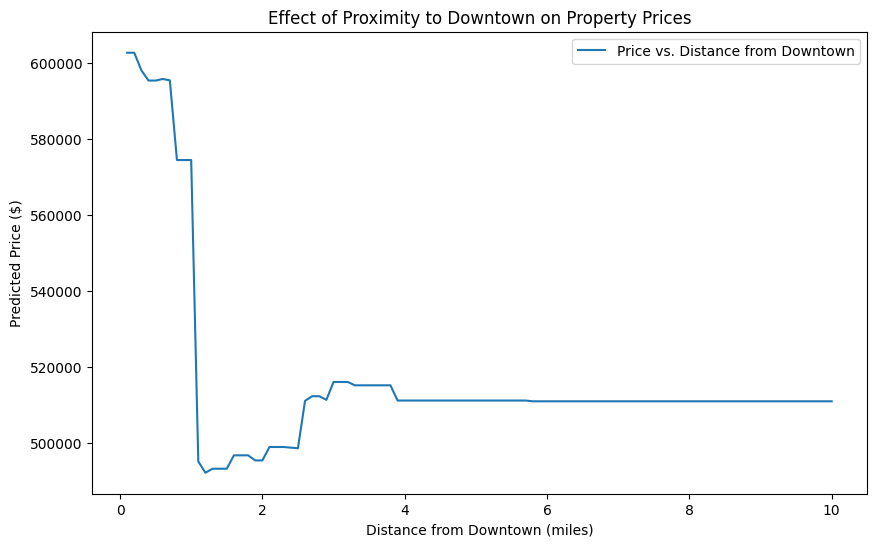

In [30]:
# Adjusting the base features for an additional full bathroom
base_features_plus_bath = base_features_df.copy()
base_features_plus_bath['Half Baths'] += 1  # Assuming the half bath can represent an additional full bathroom for demonstration
base_features_scaled_plus_bath = scaler.transform(base_features_plus_bath)
predicted_price_plus_bath = rf_model.predict(base_features_scaled_plus_bath)
print("Price with an additional full bath:", predicted_price_plus_bath[0])

# Analyzing the effect of distance from downtown
distances = np.linspace(0.1, 10, 100)
prices_distance_effect = []
for d in distances:
    temp_features = base_features_df.copy()
    temp_features['Miles'] = d
    temp_features_scaled = scaler.transform(temp_features)
    prices_distance_effect.append(rf_model.predict(temp_features_scaled)[0])

# Plotting the effect of distance on price
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(distances, prices_distance_effect, label='Price vs. Distance from Downtown')
plt.xlabel('Distance from Downtown (miles)')
plt.ylabel('Predicted Price ($)')
plt.title('Effect of Proximity to Downtown on Property Prices')
plt.legend()
plt.show()


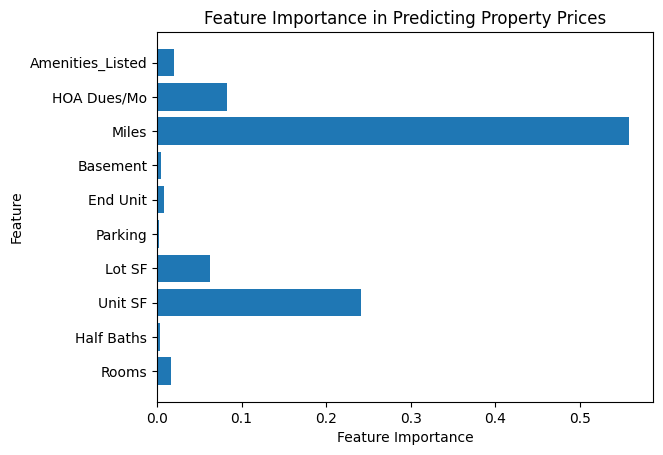

In [31]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Property Prices")
plt.show()


In [33]:
# Assuming 'data' is the final DataFrame you want to export to Excel
with pd.ExcelWriter('final_analysis.xlsx') as writer:
    data.to_excel(writer, sheet_name='Processed Data')

